### โค้ดไพทอนประกอบบทที่ 3 ของหนังสือ 
### "การโปรแกรมไพทอนสำหรับงานควบคุมและฝังตัว"
### ดร.วโรดม ตู้จินดา

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

In [2]:
num = 1
den = [10, 0.1, 0]
P = ctl.tf(num,den)
P

TransferFunction(array([1]), array([10. ,  0.1,  0. ]))

In [3]:
s = ctl.tf('s')
P = 1/(10*s**2 + 0.1*s)
P

TransferFunction(array([1]), array([10. ,  0.1,  0. ]))

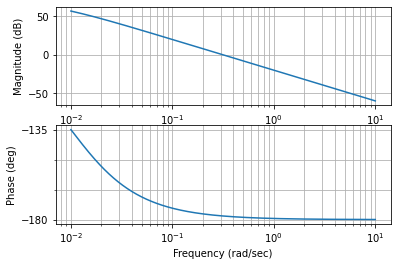

In [4]:
mag, ph, om = ctl.bode_plot(P, dB=True,omega_limits=(0.01,10))

In [5]:
s = ctl.tf('s')
P = 1/(s+1)**3
P

TransferFunction(array([1]), array([1., 3., 3., 1.]))

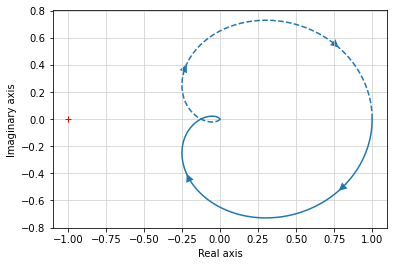

In [6]:
_ = ctl.nyquist_plot(P)

In [ ]:
# ex 3.3

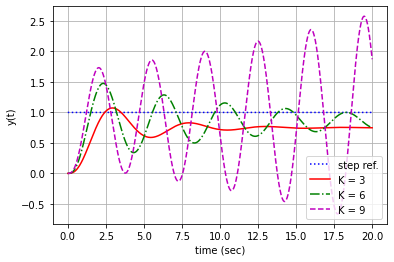

In [2]:
s = ctl.tf("s")
P = 1/(s+1)**3
K = [3.0, 6.0, 9.0]
tvec = np.arange(0,20,0.001)
r = np.ones(tvec.shape)
sys1 = ctl.feedback(K[0]*P)
sys2 = ctl.feedback(K[1]*P)
sys3 = ctl.feedback(K[2]*P)
T, y1 = ctl.step_response(sys1, tvec)
T, y2 = ctl.step_response(sys2, tvec)
T, y3 = ctl.step_response(sys3, tvec)
plt.figure()
plt.plot(T,r,'b:',T,y1,'r-',T,y2,'g-.',T,y3,'m--')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.legend(['step ref.','K = 3','K = 6','K = 9'],loc='lower right')
plt.show()

In [3]:
ctl.poles(sys1)

array([-2.44224957+0.j        , -0.27887521+1.24902477j,
       -0.27887521-1.24902477j])

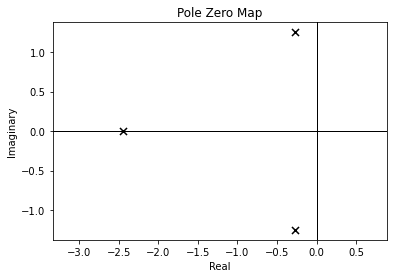

In [7]:
_,_ = ctl.pzmap(sys1)

(array([-3.08008382+0.j        ,  0.04004191+1.80140543j,
         0.04004191-1.80140543j]),
 array([], dtype=complex128))

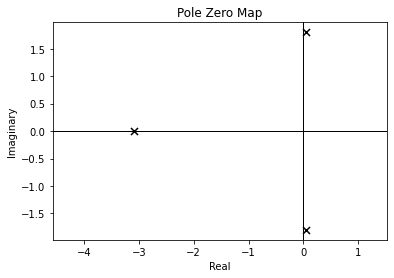

In [8]:
ctl.pzmap(sys3)

/var/folders/39/341f7l4901j_w6wssk2k47040000gn/T/ipykernel_28445/4245557687.py:2: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  _ = ctl.nyquist_plot(L1,omega_limits=(1,100))


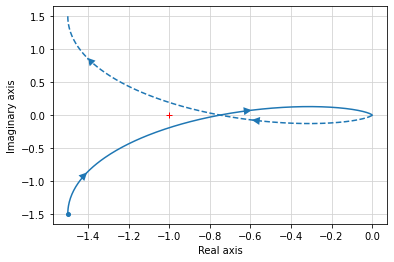

In [6]:
L1 = K[1]*P
_ = ctl.nyquist_plot(L1,omega_limits=(1,100))

/var/folders/39/341f7l4901j_w6wssk2k47040000gn/T/ipykernel_28445/3324609571.py:2: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  _ = ctl.nyquist_plot(L2,omega_limits=(1,100))


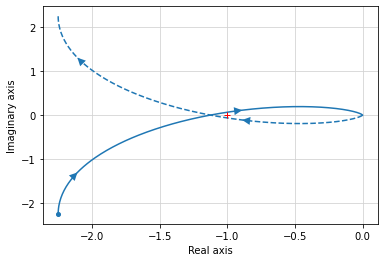

In [10]:
L2 = K[2]*P
_ = ctl.nyquist_plot(L2,omega_limits=(1,100))

In [ ]:
# ex 3.6

In [2]:
def lshape(C,P, lf, lfb, hf, hfb, pm ):
    assert lf > 0   # avoid bad values
    assert lfb > 0
    assert hf > lf
    assert hfb < 0
    assert 0 < pm < 90
    L = C*P # form loop transfer function
    # create a suitable range of frequency from lf, hf
    lf_log10 = np.log10(lf)
    w_start = np.floor(lf_log10)-1
    hf_log10 = np.log10(hf)
    w_end = np.ceil(hf_log10)+1
    w = np.logspace(w_start,w_end, 1000)
    
    # frequency response of L
    Lmag, Lph, om = ctl.freqresp(L, w)
    Lmag_db = np.squeeze(20*np.log10(Lmag))
    Lph_deg = np.squeeze(np.degrees(Lph))
    
    # create bound vectors
    lf_mask = np.where(om<lf, lfb, 0)
    hf_mask = np.where(om<hf, 0, hfb)
    lf_bnd = lf_mask*np.ones(om.shape)
    hf_bnd = hf_mask*np.ones(om.shape)
    
    # check whether violation occurs
    lf_idxv = np.where(om>lf)
    lf_idx = lf_idxv[0][0]   # find index of low-freq region
    hf_idxv = np.where(om<hf)
    hf_idx = hf_idxv[0][-1]  # find index of high-freq region
    lfmag = Lmag_db[:lf_idx]
    hfmag = Lmag_db[hf_idx:]
    if min(lfmag)<lfb:
        lf_legend = "LF bound (violated)"
    else:
        lf_legend = "LF bound"
    if max(hfmag)>hfb:
        hf_legend = "HF bound (violated)"
    else:
        hf_legend = "HF bound"    
    
    # desired phase margin vectors
    pmvec = (pm-180)*np.ones(om.shape)
    
    # compute gain/phase margins
    g_margin, ph_margin, wgm, wpm = ctl.margin(L)
    ph_at_crossover = (ph_margin-180)
    # Loopshaping plot
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
    fig.suptitle('$L(j\omega)$ v.s. bounds')
    ax1.semilogx(om, Lmag_db,'k-', om, lf_bnd, 'm-.', om, hf_bnd,'b-.')
    ax1.legend(["$|L(j\omega)|$",lf_legend,hf_legend],loc="lower left")
    ax1.grid(True)
    ax1.set_ylabel('magnitude (dB)')
    
    ax2.semilogx(om, Lph_deg,'k-',om, pmvec,'b-', wpm, ph_at_crossover,'r*')
    if ph_margin > pm:
        pmtext = "phase margin = " + str(round(ph_margin)) + " degrees"
    else:
        pmtext = "phase margin = " + str(round(ph_margin)) + " degrees (violated)"
        
    ax2.text(wpm,ph_at_crossover,pmtext)
    
    dpmtext = "Desired PM (" + str(pm) + " degrees)"
    ax2.set_xlabel('frequency (rad/s)')
    ax2.set_ylabel('phase (deg)')
    ax2.legend(["$\measuredangle L(j\omega)$",dpmtext],loc="lower left")
    ax2.grid(True)    
    
    # plot magnitude of S and T v.s bounds
    S = 1/(1+L)
    T = L/(1+L)
    
    # frequency responses of S and T
    Smag, Sph, om = ctl.freqresp(S, w)
    Tmag, Tph, om = ctl.freqresp(T, w)
    
    Smag_db = np.squeeze(20*np.log10(Smag))
    Tmag_db = np.squeeze(20*np.log10(Tmag))
   
    # check whether violation occurs
    lf_idxv = np.where(om>lf)
    lf_idx = lf_idxv[0][0]   # find index of low-freq region
    hf_idxv = np.where(om<hf)
    hf_idx = hf_idxv[0][-1]  # find index of high-freq region
    lfSmag = Smag_db[:lf_idx]
    hfTmag = Tmag_db[hf_idx:]
    if max(lfSmag)>-lfb:
        lf_legend = "LF bound (violated)"
    else:
        lf_legend = "LF bound"
    if max(hfTmag)>hfb:
        hf_legend = "HF bound (violated)"
    else:
        hf_legend = "HF bound"    
        
    # create data vector for stability bound in mid freq region
    
    om_mid = om[lf_idx:hf_idx]
    pm_r = np.radians(pm)
    x = np.sin(0.5*(np.pi - pm_r))/(np.sin(pm_r)) 
    x = 20*np.log10(x)
    bnds_mid = x*np.ones(om_mid.shape)
    
    ST_peak = max(max(Smag_db),max(Tmag_db))
    if ST_peak > x:
        mf_legend = "Stability bound (violated)"
    else:
        mf_legend = "Stability bound"
    
    plt.figure(figsize=(8,4))
    plt.semilogx(om,Smag_db,'k-',om,Tmag_db,'g-',om,-lf_bnd,'m-.',om,hf_bnd,'b-.',om_mid,bnds_mid,'r-.')
    plt.xlabel('frequency (rad/s)')
    plt.ylabel('magnitude (dB)')
    plt.legend(["$|S(j\omega)|$","$|T(j\omega)|$",lf_legend,hf_legend, mf_legend])
    plt.grid(True)
    plt.title('$|S(j\omega)|$ and $|T(j\omega)|$ v.s. bounds')
    plt.show()



In [15]:
s = ctl.tf('s')
P = 1/(10*s**2 + 0.1*s)
C = 5000

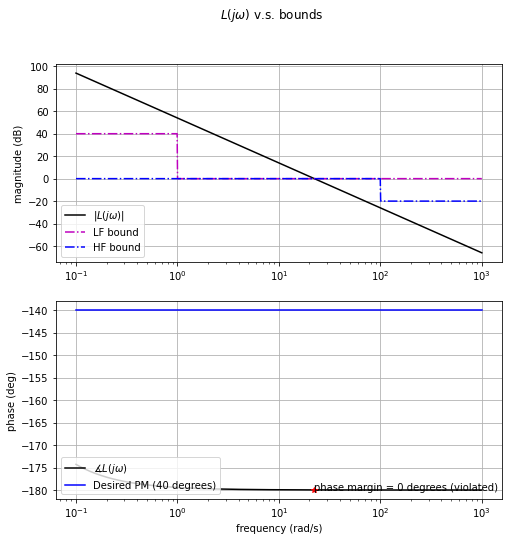

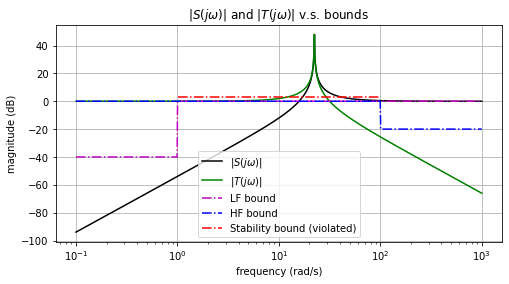

In [16]:
lf = 1 # rad/s
lfb = 40 # dB
hf = 100 # rad/s
hfb = -20 # dB
pm = 40 # deg.
lshape(C,P, lf, lfb, hf, hfb,pm )

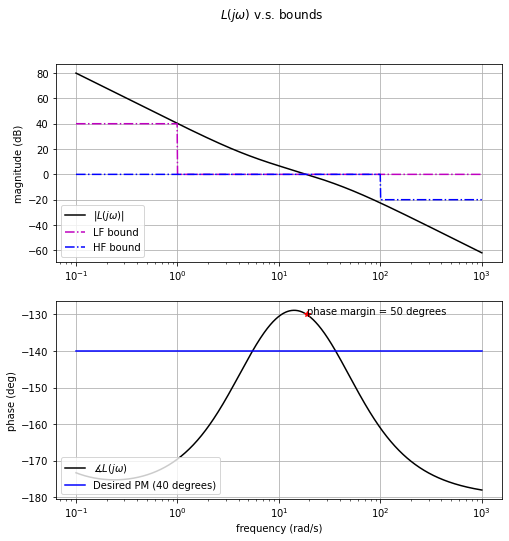

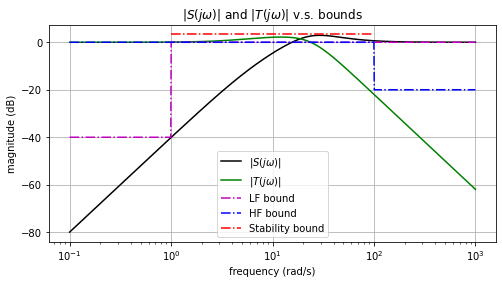

In [17]:
C = 8000*(s+5)/(s+40)
lshape(C,P, lf, lfb, hf, hfb,pm )

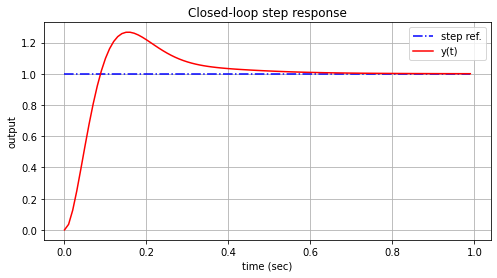

In [18]:
L = C*P
T = L/(1+L)
tvec = np.arange(0,1.0,0.01)
r = np.ones(tvec.shape)
tout, y = ctl.step_response(T,tvec)
plt.figure(figsize=(8,4))
plt.plot(tout,r,'b-.',tout,y,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y(t)'])
plt.title('Closed-loop step response')
plt.show()

In [19]:
def plot_response(sys,u,t,bnds,title):
    tout, y = ctl.forced_response(sys,t, u)
    truncated_idx = 150  # get rid of transient
    tout = tout[truncated_idx:]
    u = u[truncated_idx:]
    y = y[truncated_idx:]
    ylim = bnds*np.ones((y.shape))
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
    fig.suptitle(title)
    ax1.plot(tout,u,'b-')
    ax1.grid(True)
    ax1.set_ylabel('input')    
    ax2.plot(tout,y,'r-',tout,ylim,'g-.',tout,-ylim,'g-.')
    ax2.grid(True)
    ax2.set_ylabel('output')
    ax2.set_xlabel('time (sec)')
    plt.show()    

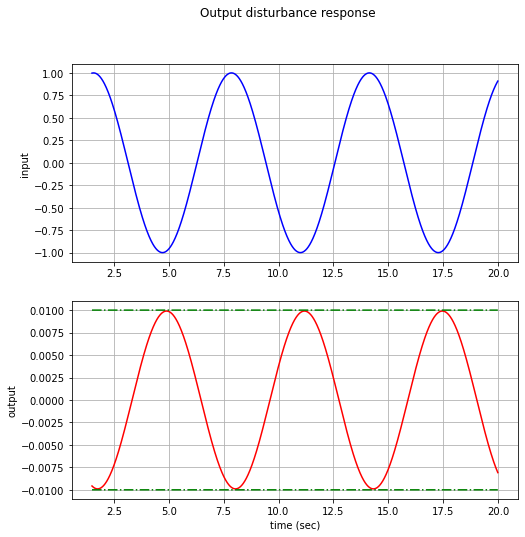

In [20]:
S = 1/(1+L)
t = np.arange(0,20,0.01)
w = 1  # rad/s
u = np.sin(w*t)
dbnds = 0.01
plot_response(S,u, t, dbnds, 'Output disturbance response')

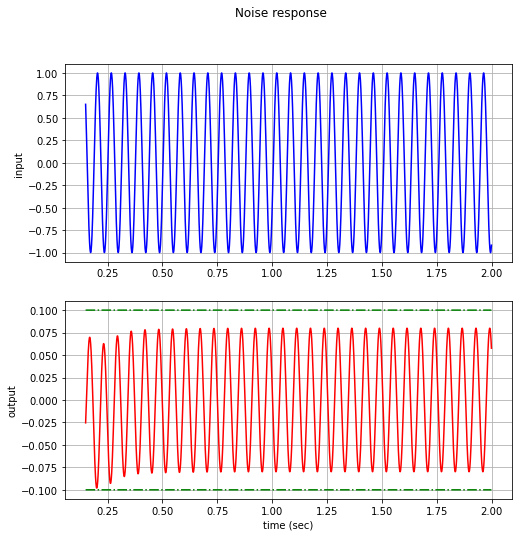

In [21]:
t = np.arange(0,2,0.001)
w = 100  # rad/s
u = np.sin(w*t)
T = L/(1+L)
nbnds = 0.1
plot_response(T,u, t,nbnds, 'Noise response')

In [ ]:
# exercise 3.7

In [6]:
def pid3(P, Kpvec, Kdvec,Kivec,tvec): 
    r = np.ones(tvec.shape)
    d = 80*np.ones(tvec.shape) #step disturbance input
    d[:int(len(tvec)/2)] = 0.0 # injected at middle of time vector
    plt.figure()
    plt.plot(tvec,r,'b') # ref.command
    for i in range(3):
        cnum = [Kdvec[i], Kpvec[i], Kivec[i]] # set Ki =0
        cden = [1, 0]
        C = ctl.tf(cnum,cden)
        L = C*P
        sys1 = ctl.feedback(L) # system for step command 
        S = 1/(1+L)
        sys2 = P*S # CL system for input disturbance
        T1, y1 = ctl.step_response(sys1, tvec) # tracking
        T2, y2 = ctl.forced_response(sys2, tvec, d) # disturbance attenuation
        y = y1 + y2
        plt.plot(T1,y)
    plt.grid('True')
    plt.xlabel('time (sec)')
    plt.ylabel('output')
    plt.legend(['step ref.','y1(t)','y2(t)', 'y3(t)'])
    plt.title("Step response of PID control with input disturbance")
    plt.show()

In [7]:
# robot-joint plant
pnum = 1
pden = [10, 0.1, 0]
P = ctl.tf(pnum,pden)

In [4]:
Kpvec =[160, 640, 1440] # proportional gains
Kdvec = [80, 160, 240] # derivative gains
Kivec = [0,0,0] # integral gains
tvec = np.arange(0,5,0.01) # adjut time vector if necessary

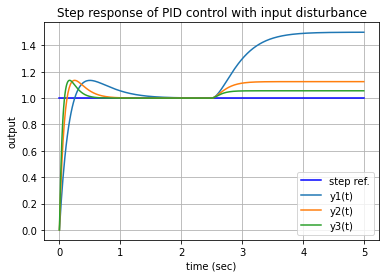

In [8]:
pid3(P, Kpvec, Kdvec, Kivec, tvec)    

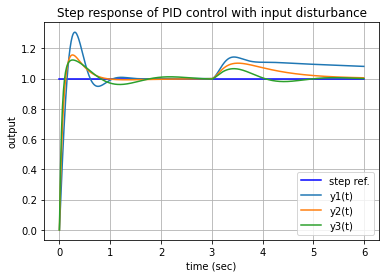

In [9]:
Kpvec = [640, 640, 640]
Kd = [160, 160, 160]
Kivec = [100, 600, 2500]
tvec = np.arange(0,6,0.01) # adjut time vector if necessary
pid3(P, Kpvec, Kdvec, Kivec, tvec)     

In [ ]:
# Ziegler -nichols

In [71]:
fo = 500
wo = 2*np.pi*fo

In [72]:
def pid_with_filter(Kp, Ki, Kd, P,wo, tvec):
    cnum = [Kd, Kp, Ki] 
    cden = [1/wo, 1, 0]
    C = ctl.tf(cnum,cden)

    
    r = np.ones(tvec.shape)
    L = C*P
    sys = ctl.feedback(L)
    #print(sys)
    T, y = ctl.step_response(sys, tvec)

    plt.figure()
    plt.plot(T,r,'b',T,y,'r-')
    plt.grid('True')
    plt.xlabel('time (sec)')
    plt.ylabel('output')
    
    plt.legend(['step ref.','y'])
    plt.show()

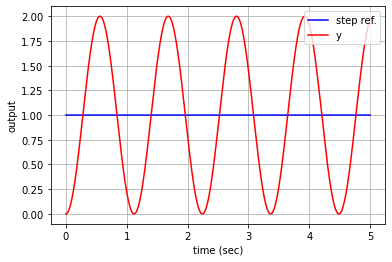

In [83]:
#Experiment with the ZNFD process
Kp = 314
Ki = 0
Kd = 0

tvec = np.arange(0,5,0.001) # adjut time vector if necessary

# PID controller function

    
pid_with_filter(Kp, Ki, Kd, P,wo, tvec)

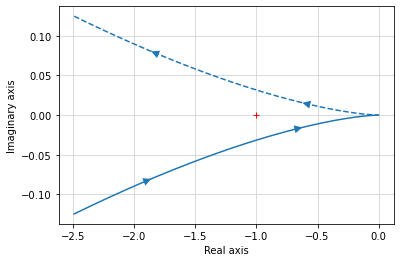

In [73]:
Kp = 1
Ki = 0
Kd = 0
# PID controller
cnum = [Kd, Kp, Ki] 
cden = [1/wo, 1, 0]
C = ctl.tf(cnum,cden)

# robot-joint plant
pnum = 1
pden = [10, 0.1, 0]
P = ctl.tf(pnum,pden)
L = C*P
_ = ctl.nyquist_plot(L,omega_limits=[0.2,100])

In [74]:
gm,_,_,_ = ctl.margin(L)
print(gm)

314.16026535897936


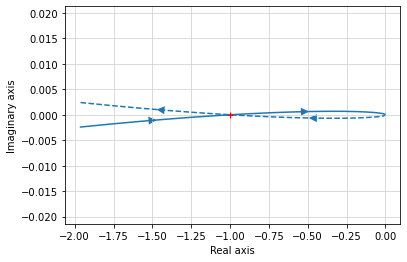

In [64]:
Kp = 314
Ki = 0
Kd = 0
# PID controller
cnum = [Kd, Kp, Ki] 
cden = [1/wo, 1, 0]
C = ctl.tf(cnum,cden)
# use the same robot joint P(s) from above
L = C*P
_ = ctl.nyquist_plot(L,omega_limits=[4,100])

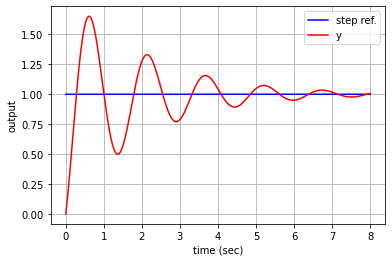

In [84]:
Ku = 314
Tu = 1.2
Kp = 0.6*Ku
Ki = 1.2*Ku/Tu
Kd = 0.075*Ku*Tu
tvec = np.arange(0,8,0.001) # adjut time vector if necessary
pid_with_filter(Kp, Ki, Kd, P,wo, tvec)

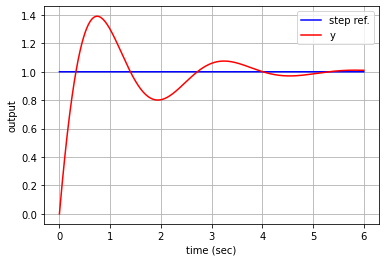

In [77]:
Ku = 314
Tu = 1.2
Kp = 0.33*Ku
Ki = 0.66*Ku/Tu
Kd = 0.11*Ku*Tu
tvec = np.arange(0,6,0.001) # adjut time vector if necessary
pid_with_filter(Kp, Ki, Kd, P,wo, tvec)

In [ ]:
# Ziegler-nichols applied to 3rd order lag 

In [2]:
s = ctl.tf('s')
P = 1/(s+1)**3
P

TransferFunction(array([1]), array([1., 3., 3., 1.]))

In [3]:
gm,_,_,_ = ctl.margin(P)
print(gm)

8.0


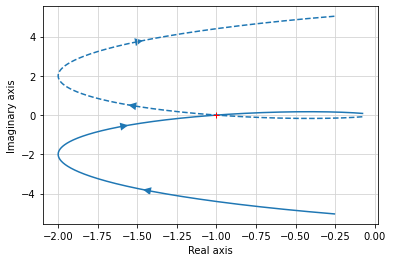

In [13]:
L = 8.0*P
_ = ctl.nyquist_plot(L,omega_limits=[0.6,4])

In [9]:
def plot_step_response(tvec,y):
    plt.figure(figsize=(8,4))
    r = np.ones(tvec.shape)
    plt.plot(tout,r,'b-.',tout,y,'r-')
    plt.grid('True')
    plt.xlabel('time (sec)')
    plt.ylabel('output')
    plt.legend(['step ref.','y(t)'])
    plt.show()    

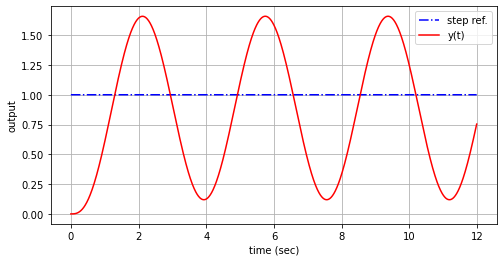

In [21]:
T = L/(1+L)
tvec = np.arange(0,12,0.01)
tout, y = ctl.step_response(T,tvec)
plot_step_response(tout,y)

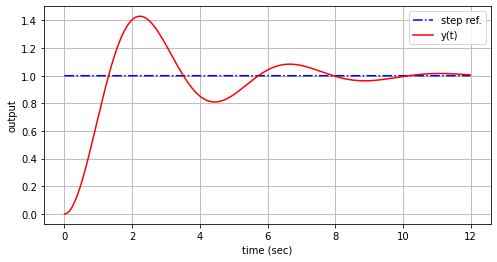

In [26]:
Ku = 8
Tu = 3.5
Kp = 0.6*Ku
Ki = 1.2*Ku/Tu
Kd = 0.075*Ku*Tu
C = Kp + Ki/s + Kd*s
L = C*P
T = L/(1+L)
tout, y = ctl.step_response(T,tvec)
plot_step_response(tout,y)

In [24]:
# derivative filter

2.1

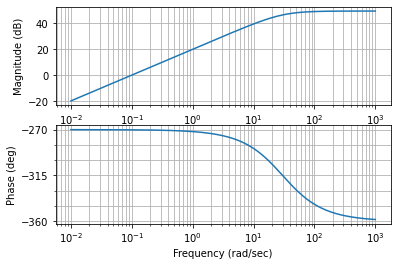

In [2]:
N = 30
Kd = 10
dnum = [N*Kd,0]
dden = [1, N]
Dtf = ctl.tf(dnum,dden)
mag, ph, om = ctl.bode_plot(Dtf, dB=True,omega_limits=(0.01,1000))

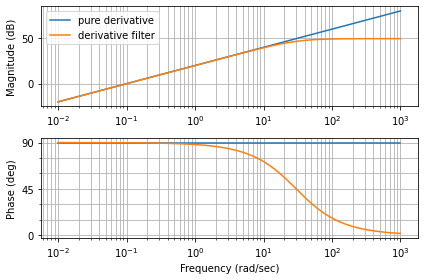

In [9]:
N = 30
Kd = 10
dnum = [Kd,0]
dden = [1]
Dtf= ctl.tf(dnum,dden)
dfnum = [N*Kd,0]
dfden = [1, N]
Dftf = ctl.tf(dfnum,dfden)
mag, ph, om = ctl.bode_plot([Dtf, Dftf], dB=True,omega_limits=(0.01,1000),wrap_phase=True)
plt.tight_layout()
ax1, ax2 = plt.gcf().axes
plt.sca(ax1)
plt.legend(['pure derivative','derivative filter'])

Text(0.5, 0, 'time (sec)')

<Figure size 432x288 with 0 Axes>

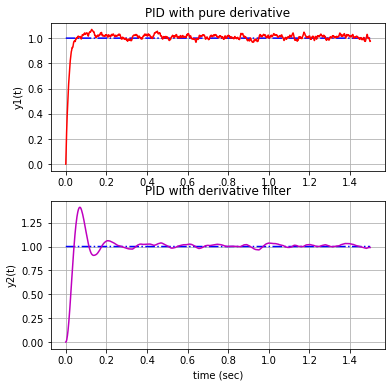

In [33]:
# PID gains. 
Kp = 1544
Ki = 700
Kd = 700
s = ctl.tf('s')
# robot-joint plant
P = 1/(10*s**2+0.1*s)
# Original PID controller (4)
C1 = Kp + Ki/s + Kd*s

# Modified PID controller (15)
N = 30
C2 = Kp + Ki/s + N*Kd*s/(N+s)

tvec = np.arange(0,1.5,0.001) # adjut time vector if necessary
r = np.ones(tvec.shape)
rn = r + 0.3*(np.random.rand(tvec.shape[0])-0.5)
L1= C1*P
sys1 = ctl.feedback(L1)
L2 = C2*P
sys2= ctl.feedback(L2)
tv, y1 = ctl.forced_response(sys1, tvec, rn)
tv, y2 = ctl.forced_response(sys2, tvec, rn)

plt.figure()
fig, (ax1,ax2) = plt.subplots(2, figsize=(6,6))
ax1.plot(tv,r,'b-.',tv,y1,'r-')
ax1.grid('True')
ax1.set_ylabel('y1(t)')
ax1.set_title('PID with pure derivative')
ax2.plot(tv,r,'b-.',tv,y2,'m-')
ax2.grid('True')
ax2.set_ylabel('y2(t)')
ax2.set_title('PID with derivative filter')
ax2.set_xlabel('time (sec)')

In [ ]:
def limiter(t, x, u, params):
    return x

def lim_out(t, x, u, params):
    a = params.get('a',50)
    return np.clip(u,-a,a)


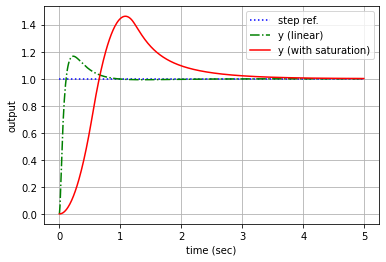

In [6]:
# use PID with LPF
Kp = 640
Ki = 600
Kd = 160
# PID controller
s = ctl.tf('s')
N = 100
C = Kp + Ki/s + N*Kd*s/(N+s)
P = 1/(10*s**2+0.1*s)

tvec = np.arange(0,5,0.01) # adjut time vector if necessary
r = np.ones(tvec.shape)


io_limsys = ctl.NonlinearIOSystem(limiter, lim_out, inputs=('u'), outputs=('ulim'), states=('x'),name='limiter')

io_Psys = ctl.LinearIOSystem(ctl.tf2ss(P))
io_Csys = ctl.LinearIOSystem(ctl.tf2ss(C))

io_Lsys = io_Psys*io_limsys*io_Csys
io_Lsys_nolim = io_Psys*io_Csys


ss_unity = ctl.ss(0,0,0,1)
io_unity = ctl.LinearIOSystem(ss_unity)

io_clsys = ctl.feedback(io_Lsys, io_unity)
io_clsys_nolim = ctl.feedback(io_Lsys_nolim, io_unity)

T,y_nolim = ctl.input_output_response(io_clsys_nolim, tvec,r)
T,y = ctl.input_output_response(io_clsys, tvec,r)
plt.figure()
plt.plot(T,r,'b:',T,y_nolim,'g-.',T,y,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y (linear)', 'y (with saturation)'])
plt.show()

In [ ]:
# Example 3.10

In [2]:
A = np.array([[-1.,0.,0.  ], [ 1.,-1.,0.  ],[0.,1.,-1.]])
B = np.array([[1.],[ 0.],[0.]])
C = np.array([[ 0.,0.,1.]])
D = np.array([0.])
Pss = ctl.ss(A,B,C,D)
Pss

<LinearIOSystem:sys[2]:['u[0]']->['y[0]']>

In [3]:
np.linalg.matrix_rank(ctl.ctrb(A,B))

3

In [4]:
s = ctl.tf('s')
zeta = 0.7
wn = 1.8
lamda_s = (s**2 + 2*zeta*wn*s+wn**2)*(s+100)
desired_poles = ctl.zero(lamda_s) # poles are roots of characteristic polynomial
print(desired_poles)

[-100.  +0.j           -1.26+1.28545712j   -1.26-1.28545712j]


In [5]:
K = ctl.place(A, B, desired_poles)
print(K)

[[ 99.52  53.2  170.28]]


In [10]:
K = ctl.acker(A, B, desired_poles)
print(K)

[[ 99.52  53.2  170.28]]


In [6]:
Tss = ctl.ss(A-B@K, B, C, D)
ctl.pole(Tss)

array([-100.  +0.j        ,   -1.26+1.28545712j,   -1.26-1.28545712j])

In [7]:
ffgain=1/ctl.dcgain(Tss)
print(ffgain)

323.9999999999998


In [25]:
def plot_step_response(tvec,y):
    plt.figure(figsize=(6,4))
    r = np.ones(tvec.shape)
    plt.plot(tvec,r,'b-.',tvec,y,'r-')
    plt.grid('True')
    plt.xlabel('time (sec)')
    plt.ylabel('output')
    plt.legend(['step ref.','y(t)'])
    plt.show()    

In [17]:
tvec = np.arange(0,20,0.001)
midpts = int(len(tvec)/2)
dist_level = 0.1
r = np.ones(tvec.shape)
rc = np.ones(tvec.shape)
d = dist_level*np.ones(tvec.shape)
d[:midpts] = 0
u = ffgain*(rc - d)

In [18]:
t, y = ctl.forced_response(Tss, tvec, u)

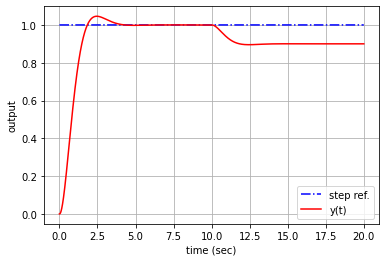

In [21]:
plot_step_response(t,y)

In [ ]:
# state feedback + integrator

In [38]:
s = ctl.tf('s')
zeta = 0.7
wn = 2.5 # design 2
lamda_s = (s**2 + 2*zeta*wn*s+wn**2)*(s+100)
desired_poles = ctl.zero(lamda_s) # poles are roots of characteristic polynomial
K = ctl.place(A, B, desired_poles)
print(K)

[[100.5  152.25 371.25]]


In [34]:
K = ctl.place(A, B, desired_poles)
print(K)

[[100.5  152.25 371.25]]


In [45]:
Ki = 450
A_a = np.hstack((A-B@K, -Ki*B))
C_a = np.hstack((C,[[0]]))
A_a = np.vstack((A_a,C_a))
A_a
B_d = np.vstack((B,0))
B_r = np.vstack((np.zeros(B.shape),-1))
B_a = np.hstack((B_d,B_r))
D_a = np.zeros((1,2))
Tss_a = ctl.ss(A_a, B_a, C_a,D_a) #  two-inputs one-output closed-loop system

In [57]:
Tss = ctl.ss(A-B@K, B, C, D)
ctl.pole(Tss)
ffgain=1/ctl.dcgain(Tss)
print(ffgain)

624.9999999999998


In [58]:
ffgain

624.9999999999998

In [59]:
tvec = np.arange(0,20,0.001)
midpts = int(len(tvec)/2)
dist_level = 0.1
r = np.ones(tvec.shape)
d = -dist_level*ffgain*np.ones(tvec.shape)
d[:midpts] = 0
u = np.vstack((d,r))
t, y = ctl.forced_response(Tss_a, tvec, u)

In [28]:
y.shape

(1, 20000)

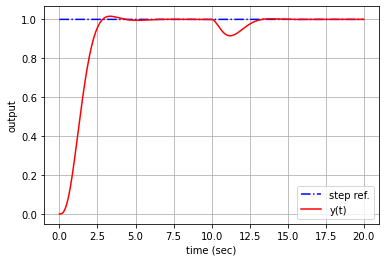

In [60]:
plot_step_response(t,y.T)

In [ ]:
# ex. 3.12

In [2]:
s = ctl.tf('s')
P = 1/(10*s**2 + 0.1*s)
P

TransferFunction(array([1]), array([10. ,  0.1,  0. ]))

In [3]:
Ts = 0.01
Pd = ctl.sample_system(P, Ts, method='tustin')
Pd

TransferFunction(array([2.49987501e-06, 4.99975001e-06, 2.49987501e-06]), array([ 1.    , -1.9999,  0.9999]), 0.01)

In [5]:
C = 20000*(s+0.01)/(s+100)
C

TransferFunction(array([20000.,   200.]), array([  1, 100]))

In [6]:
Cd = ctl.sample_system(C, Ts, method='tustin')
Cd

TransferFunction(array([ 13334.        , -13332.66666667]), array([ 1.        , -0.33333333]), 0.01)

In [11]:
Ld = Cd*Pd
Td = ctl.feedback(Ld)
Td

TransferFunction(array([ 0.03333333,  0.03333667, -0.03332667, -0.03333   ]), array([ 1.03333333, -2.29989667,  1.63320667, -0.36663   ]), 0.01)

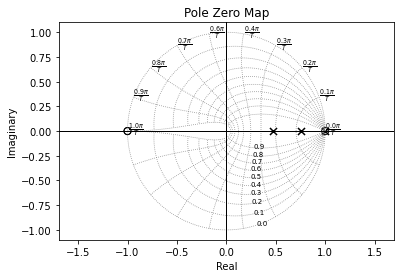

In [13]:
poles,zeros = ctl.pzmap(Td,grid=True)

In [15]:
def compare_step_responses(tvec,y1,y2):
    plt.figure(figsize=(6,4))
    r = np.ones(tvec.shape)
    plt.plot(tvec,r,'b-.',tvec,y1,'r-',tvec,y2,'g:')
    plt.grid('True')
    plt.xlabel('time (sec)')
    plt.ylabel('output')
    plt.legend(['step ref.','y(t) - continuous','y(t) - discrete'])
    plt.show()   

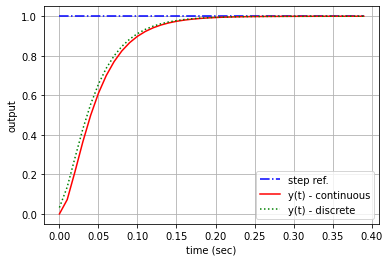

In [22]:
tvec = np.arange(0,0.4,Ts) 
# form continouous time closed-loop system 
L = C*P
Tc = ctl.feedback(L)
Tv, yc = ctl.step_response(Tc, tvec)
Tv, yd = ctl.step_response(Td, tvec)
compare_step_responses(tvec,yc,yd)

In [21]:
C_bad = 20000*(s+100)/(s+0.01)

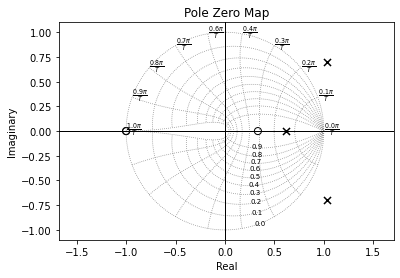

In [24]:
Cd_bad = ctl.sample_system(C_bad, Ts, method='tustin')
Ld_bad = Cd_bad*Pd
Td_bad = ctl.feedback(Ld_bad)
_,_ = ctl.pzmap(Td_bad, grid=True)

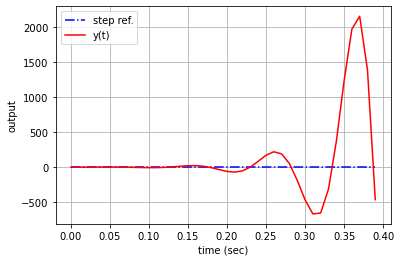

In [27]:
t_bad, y_bad = ctl.step_response(Td_bad, tvec)
plot_step_response(t_bad,y_bad)

In [ ]:
# example 3.13

In [7]:
def pid_compare(kp, ki, kd, N, T, tvec):
    s = ctl.tf('s')
    z = ctl.tf('z')
    
    # continuous-time plant
    P = 1/(10*s**2+0.1*s)

    # continuous-time PID
    C_c = kp + ki/s + s*N*kd/(s+N)
    
    L_c = C_c*P
    sys_c = ctl.feedback(L_c)
    #print(sys)
    Tv, y_c = ctl.step_response(sys_c, tvec)
    
    # discretize the plant using bilinear transformation
    P_d = (T*(z+1)/(2*(z-1)))*(T*z+T)/((20+0.1*T)*z - 20 + 0.1*T)
    
    # forward difference method
    C_fd = kp + ki*T/(z-1) + kd*N*(z-1)/(z-1+N*T)
    L_fd = C_fd*P_d
    sys_fd = ctl.feedback(L_fd)
    Tv, y_fd = ctl.step_response(sys_fd, tvec)
       
    # backward difference method    
    C_bd = kp + ki*T*z/(z-1) + kd*N*(z-1)/((1+N*T)*z-1)
    L_bd = C_bd*P_d
    sys_bd = ctl.feedback(L_bd)
    Tv, y_bd = ctl.step_response(sys_bd, tvec)

    
    # bilinear transformation difference method    
    C_bt = kp + ki*T*(z+1)/(2*(z-1)) + kd*N*(z-1)/((1+0.5*N*T)*z+0.5*N*T -1)
    L_bt = C_bt*P_d
    sys_bt = ctl.feedback(L_bt)
    Tv, y_bt = ctl.step_response(sys_bt, tvec)
    
    r = np.ones(tvec.shape)
    plt.figure()
    plt.plot(Tv,r,'b',Tv,y_c,'r-', Tv, y_fd,'b:',Tv, y_bd,'g-.',Tv, y_bt,'m--')
    plt.grid('True')
    plt.xlabel('time (sec)')
    plt.ylabel('output')
    
    plt.legend(['step ref.','y (continuous)','y (forward difference)', 
                'y (backward difference)', 'y (bilinear transform)'])
    plt.show()
    return y_c, y_fd, y_bd, y_bt
 

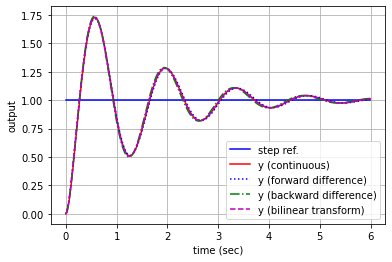

In [16]:
kp = 200; ki = 240; kd = 25; N = 20
Ts = 0.01
tvec = np.arange(0,6, Ts)
_,_,_,_ = pid_compare(kp, ki, kd, N, Ts, tvec)

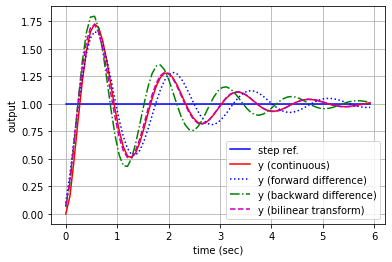

In [17]:
Ts = 0.08
tvec = np.arange(0,6, Ts)
_,_,_,_ = pid_compare(kp, ki, kd, N, Ts, tvec)

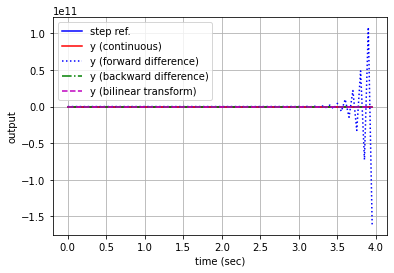

In [20]:
Ts = 0.05; N = 50
tvec = np.arange(0,4, Ts)
y,y_fd,y_bd,y_bt = pid_compare(kp, ki, kd, N, Ts, tvec)

In [11]:
print(" y (continuous-time) = {}\n y (forward diff.)= {}\n y (backward diff) = {}\n y (bilinear t.f) = {}"
      .format(y[79],y_fd[79],y_bd[79],y_bt[79]))

 y (continuous-time) = 0.972792603027794
 y (forward diff.)= -161763723763.7304
 y (backward diff) = 0.9359998926238712
 y (bilinear t.f) = 0.9693209730532245


[-47.38414585+0.j         -0.65861686+4.3495527j  -0.65861686-4.3495527j
  -1.30862043+0.j       ]


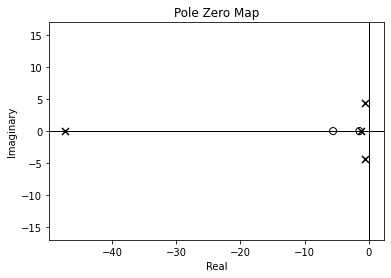

In [26]:
s = ctl.tf('s')
C_c = kp + ki/s + s*N*kd/(s+N)
P = 1/(10*s**2+0.1*s)
L_c = C_c*P
ctl.feedback(L_c)
print(ctl.pole(T_c))
_,_ =ctl.pzmap(T_c)

[-1.49240397+0.j          0.95150995+0.20018105j  0.95150995-0.20018105j
  0.93497821+0.j        ]


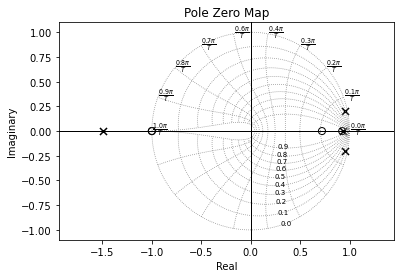

In [27]:
z = ctl.tf('z')
C_fd = kp + ki*Ts/(z-1) + kd*N*(z-1)/(z-1+N*Ts)
P_d = (Ts*(z+1)/(2*(z-1)))*(Ts*z+Ts)/((20+0.1*Ts)*z - 20 + 0.1*Ts)
L_fd = C_fd*P_d
T_fd = ctl.feedback(L_fd)
print(ctl.pole(T_fd))
_,_ = ctl.pzmap(T_fd, grid=True)

In [ ]:
def leadlag_control():
    global e,e1,u,u1
    e1 = e
    u1 = u
    r = readCmd()
    y = readADC()
    e = r - y
    u = 0.9048*u1 + 19047.714*e - 19047.524*e1 # (3.82)
    writePWM(u)

In [ ]:
# Example 3.15

In [2]:
s = ctl.tf('s')
P = 1/(s+1)**3
Ts = 0.01
Pd = ctl.sample_system(P, Ts, method='tustin')
Pd

TransferFunction(array([1.23143595e-07, 3.69430784e-07, 3.69430786e-07, 1.23143594e-07]), array([ 1.        , -2.97014925,  2.94059553, -0.97044529]), 0.01)

In [3]:
Pdnum, Pdden = ctl.tfdata(Pd)
pdnum = np.squeeze(np.array(Pdnum))
pdden = np.squeeze(np.array(Pdden))
print("plant numerator coefficients = "+str(pdnum))
print("plant denominator coefficients = "+str(pdden))

plant numerator coefficients = [1.23143595e-07 3.69430784e-07 3.69430786e-07 1.23143594e-07]
plant denominator coefficients = [ 1.         -2.97014925  2.94059553 -0.97044529]


In [4]:
px_size = len(pdden)  
px = np.zeros((px_size,1)) # plant state vector

In [10]:
tvec = np.arange(0,20,Ts) 
yvec = np.zeros(tvec.shape)
uvec = np.zeros(tvec.shape)
d=10

In [11]:
# perform discrete-time simulation 
for i in range(len(tvec)):
    for k in range(px_size-1):
        px[px_size-k-1] = px[px_size-k-2]
    if yvec[i-1]>0:  # relay feedback
        uvec[i] = -d
    else:
        uvec[i] = d
    px[0] = uvec[i]
    yvec[i] = pdnum[0]*uvec[i]
    for k in range(px_size-1):
        px[0] = px[0] -pdden[k+1]*px[k+1]
        yvec[i] = yvec[i] + (pdnum[k+1] - pdnum[0]*pdden[k+1])*px[k+1]    

Text(0.5, 0, 'time (sec)')

<Figure size 432x288 with 0 Axes>

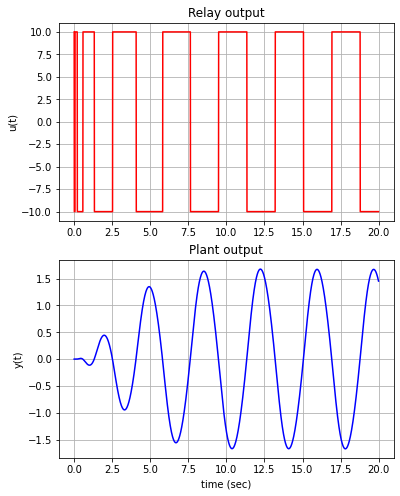

In [15]:
plt.figure()
fig, (ax1,ax2) = plt.subplots(2, figsize=(6,8))
ax1.plot(tvec,uvec,'r-')
ax1.grid('True')
ax1.set_ylabel('u(t)')
ax1.set_title('Relay output')
ax2.plot(tvec,yvec,'b-')
ax2.grid('True')
ax2.set_ylabel('y(t)')
ax2.set_title('Plant output')
ax2.set_xlabel('time (sec)')

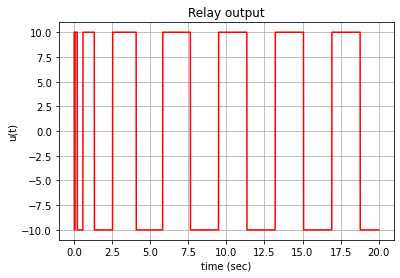

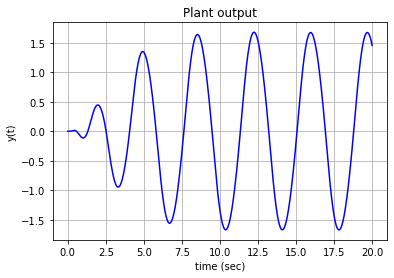

In [12]:
# plot the result
plt.figure()
plt.plot(tvec,uvec,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('u(t)')
plt.title("Relay output")

plt.figure()
plt.plot(tvec, yvec,'b-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')

plt.title("Plant output")

plt.show()

In [16]:
max(yvec)

1.676499148880076

In [20]:
def measure_period(tvec,yved):
    #Tu = 0
    t_old = t_new = 0.0
    for i in range(len(yvec)):
        if yvec[i-1]<0 and yvec[i]>0:
            t_old = t_new
            t_new = tvec[i]
    Tu = t_new - t_old
    return Tu        

In [21]:
measure_period(tvec,yvec)

3.7200000000000006

In [23]:
Ku = 40/(np.pi*max(yvec))
Ku

7.5946328131792

In [2]:
# Example 3.16

In [5]:
km = 100  # torque constant
kb = 1  # back EMF constant
k = 1000 # torsional stiffness of harmonic drive
r = 10   # gear ratio
R = 1  # armature resistance
L = 0.1 # armature inductance
Jm = 1  #  motor inertia
Bm = 0.01  # motor shaft friction
Jl = 3  # load inertia
Bl = 0.05  # load friction
s = ctl.tf("s")
pl = Jl*s**2 + Bl*s + k
pm = Jm*s**2 + Bm*s + k
P = km*k/(pm*pl*(L*s+R) - k**2*(L*s+R) + r*km*kb*s*pl)
P

TransferFunction(array([100000]), array([3.00000000e-01, 3.00800000e+00, 3.40008005e+03, 4.05600050e+03,
       1.00006000e+06, 0.00000000e+00]))

In [4]:
# example 3.17 

In [3]:
def PRBS_generator(amplitude=1000,N=8091):
	bvec = np.array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])
	u_out = np.zeros(N)
	for i in range(N):
		feedin = bvec[0] ^ (bvec[2]^(bvec[3]^ bvec[12]))
		for j in range(12,1,-1):  
			bvec[j] = bvec[j-1]
		bvec[1] = feedin
		u_out[i] = amplitude*(2*bvec[12] - 1)
	return u_out


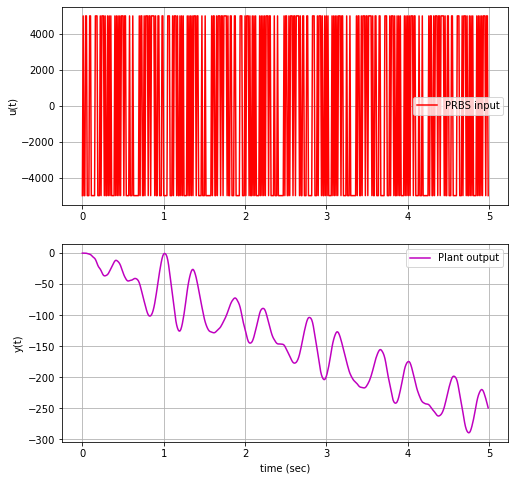

In [6]:
noise_level = 0.1
Ts = 0.01
t_sim = np.arange(0,5,Ts)
num_samples = t_sim.shape[0]
u_data = PRBS_generator(5000,num_samples) # generate PRBS with spedified amplitude
t_data, y_data = ctl.forced_response(P, t_sim, u_data)
ym_data = y_data + noise_level*np.random.rand(num_samples) # add noise to output
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
ax1.plot(t_data,u_data,'r-')
ax1.grid(True)
ax1.set_ylabel('u(t)')
ax1.legend(["PRBS input"])
ax2.plot(t_data,ym_data,'m-')
ax2.grid(True)
ax2.set_ylabel('y(t)')
ax2.set_xlabel('time (sec)')
ax2.legend(["Plant output"])
plt.show()    


In [ ]:
# Problem LSID

In [17]:
m = 13  # model order
data_pts = 500

In [18]:
# create vector Y and matrix X
Y = ym_data[m:data_pts]
X = np.zeros((data_pts-m,2*m))
for j in range(data_pts - m):
    Y_row = []
    U_row = []
    for i in range(m):
        Y_row.insert(0, -y_data[j+i])
        U_row.insert(0, u_data[j+i])
    X_row = np.hstack((np.asarray(Y_row),np.asarray(U_row)))
    X[j,:] = X_row

In [19]:
theta_LS = np.linalg.pinv(X)@Y
theta_LS

array([-6.25918246e-01, -3.50127012e-01, -2.10856090e-01, -1.81681620e-01,
       -1.39745586e-01,  9.00595955e-03,  2.23779925e-01,  3.55552348e-01,
        2.91035209e-01,  7.38111414e-02, -1.26847319e-01, -1.81094241e-01,
       -1.36643978e-01,  1.60899225e-06,  1.97794298e-05,  6.56790606e-05,
        1.29210389e-04,  1.78880962e-04,  1.87782706e-04,  1.53927380e-04,
        9.86154654e-05,  4.83488231e-05,  1.71663972e-05,  3.85915752e-06,
        5.32508695e-08,  1.65293932e-07])

In [20]:
a_n = theta_LS[:m]
b_n = theta_LS[m:2*m]

In [21]:
# requires some thinking
z = ctl.tf('z')
numz = 0
denz = z**m
for i in range(m):
    numz = numz + b_n[i]*z**(m-i-1)
    denz = denz + a_n[i]*z**(m-i-1)
Pz_lsid = numz/denz
P_lsid

TransferFunction(array([1.60899225e-06, 1.97794298e-05, 6.56790606e-05, 1.29210389e-04,
       1.78880962e-04, 1.87782706e-04, 1.53927380e-04, 9.86154654e-05,
       4.83488231e-05, 1.71663972e-05, 3.85915752e-06, 5.32508695e-08,
       1.65293932e-07]), array([ 1.        , -0.62591825, -0.35012701, -0.21085609, -0.18168162,
       -0.13974559,  0.00900596,  0.22377993,  0.35555235,  0.29103521,
        0.07381114, -0.12684732, -0.18109424, -0.13664398]), True)

In [22]:
fz = -(s*Ts+2)
gz = (s*Ts-2)
nj= m - 1 # change this
nums_id = b_n[nj]*gz**(nj+1)
dens_id = fz**(nj+1) + a_n[nj]*gz**(nj+1)
for j in range(nj):
    nums_id = nums_id + b_n[j]*(fz**(nj-j))*(gz**(j+1))
    dens_id = dens_id + a_n[j]*(fz**(nj-j))*(gz**(j+1))

In [23]:
P_id = nums_id/dens_id
P_id

TransferFunction(array([-1.37969099e-33, -2.74201873e-29, -5.49071499e-27, -2.00557058e-23,
       -1.70543170e-21, -2.39502478e-18,  1.37870326e-16,  6.29518172e-14,
        3.95681708e-11,  8.22661177e-09,  2.18356942e-07, -1.75654126e-04,
       -4.82015262e-02, -7.41439331e+00]), array([-1.45066266e-26, -3.37988897e-23, -4.30691897e-20, -2.73735290e-17,
       -1.47782507e-14, -4.33613013e-12, -1.29638807e-09, -1.85150037e-07,
       -3.44243387e-05, -1.90364241e-03, -2.56824794e-01, -8.00143733e-01,
       -7.44189087e+01, -2.21587035e+00]))

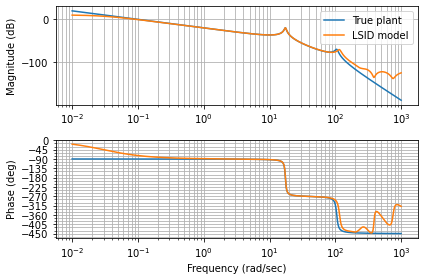

In [24]:
_,_,_ = ctl.bode_plot([P, P_id],dB=True, omega_limits=(0.01,1000))
plt.tight_layout()
ax1, ax2 = plt.gcf().axes
plt.sca(ax1)
plt.legend(['True plant','LSID model'])

In [7]:
Y = ym_data[7:490]
X = np.zeros((483,14))
for j in range(482):
    	X[j,:] = np.array([ -y_data[j+6], -y_data[j+5], -y_data[j+4], -y_data[j+3], -y_data[j+2], -y_data[j+1], -y_data[j], u_data[j+6], u_data[j+5], u_data[j+4], u_data[j+3], u_data[j+2], u_data[j+1], u_data[j]])

In [8]:
theta_LS = np.linalg.pinv(X)@Y
theta_LS

array([-2.40425806e+00,  1.54818916e+00,  5.90932000e-01, -1.08834036e+00,
       -3.58285031e-01,  1.39821790e+00, -6.86164700e-01,  1.92396252e-06,
        1.57455631e-05,  3.18766897e-05,  2.83843193e-05,  1.18574258e-05,
        1.69351488e-06, -3.76278118e-08])

In [9]:
a_n = theta_LS[:7]
b_n = theta_LS[7:14]

In [10]:
z = ctl.tf("z")
numz = b_n[0]*z**6 + b_n[1]*z**5 + b_n[2]*z**4 + b_n[3]*z**3 + b_n[4]*z**2 + b_n[5]*z + b_n[6]
denz = z**7 + a_n[0]*z**6 + a_n[1]*z**5 + a_n[2]*z**4 + a_n[3]*z**3 + a_n[4]*z**2 + a_n[5]*z + a_n[6]
Pz_lsid = numz/denz
Pz_lsid

TransferFunction(array([ 1.92396252e-06,  1.57455631e-05,  3.18766897e-05,  2.83843193e-05,
        1.18574258e-05,  1.69351488e-06, -3.76278118e-08]), array([ 1.        , -2.40425806,  1.54818916,  0.590932  , -1.08834036,
       -0.35828503,  1.3982179 , -0.6861647 ]), True)

In [11]:
fz = -(s*Ts+2)
gz = (s*Ts-2)
nj=6
nums_id = b_n[nj]*gz**(nj+1)
dens_id = fz**(nj+1) + a_n[nj]*gz**(nj+1)
for j in range(nj):
    nums_id = nums_id + b_n[j]*(fz**(nj-j))*(gz**(j+1))
    dens_id = dens_id + a_n[j]*(fz**(nj-j))*(gz**(j+1))

In [12]:
P_id = nums_id/dens_id
P_id

TransferFunction(array([-2.02947119e-21, -8.39435208e-18, -5.23256147e-15, -1.86909777e-12,
        4.39177375e-10,  3.88521362e-07, -1.06063457e-05, -1.17048125e-02]), array([-5.71584248e-14, -2.25883372e-11, -3.06304134e-08, -6.85815244e-07,
       -4.06931147e-04, -6.98589238e-04, -1.21259542e-01, -3.72365733e-02]))

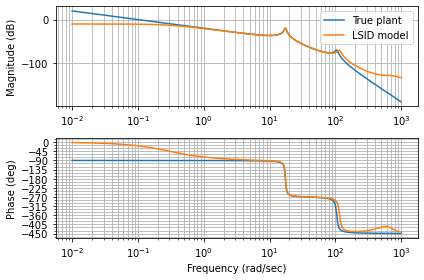

In [14]:
_,_,_ = ctl.bode_plot([P, P_id],dB=True, omega_limits=(0.01,1000))
plt.tight_layout()
ax1, ax2 = plt.gcf().axes
plt.sca(ax1)
plt.legend(['True plant','LSID model'])

(array([-4.52416794+104.88967916j, -4.52416794-104.88967916j,
        -0.4891654  +17.38377777j, -0.4891654  -17.38377777j,
         0.          +0.j        ]),
 array([], dtype=complex128))

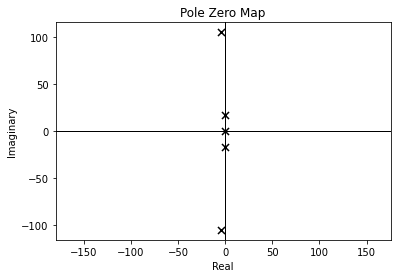

In [15]:
ctl.pzmap(P)

(array([-191.09180545+693.29449862j, -191.09180545-693.29449862j,
          -5.87210355+115.7065412j ,   -5.87210355-115.7065412j ,
          -0.4764457  +17.46246894j,   -0.4764457  -17.46246894j,
          -0.30752889  +0.j        ]),
 array([-3474.25288162  +0.j        ,  -273.55955356+544.41646838j,
         -273.55955356-544.41646838j,  -407.62335029  +0.j        ,
          285.13927785  +0.j        ,   200.          +0.j        ,
         -192.37022897  +0.j        ]))

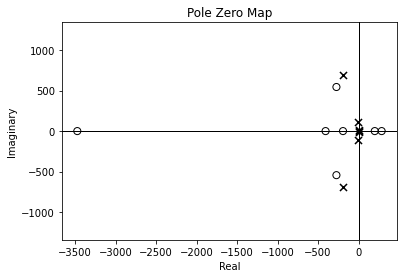

In [16]:
ctl.pzmap(P_id)